## Data Pre-Processing

### Importing libraries

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading Data

In [31]:
seed = 123

In [32]:
song_data=pd.read_excel('Songs_2024.xlsx',1)

song_data.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,Yellow,91,Parachutes,Coldplay,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,Breathe,69,Breathe,Faith Hill,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,In the End,88,Hybrid Theory (Bonus Edition),Linkin Park,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,Bye Bye Bye,74,No Strings Attached,*NSYNC,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


In [33]:
song_data.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,73.006960,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,15.643937,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-56.000000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,63.000000,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,74.000000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,83.000000,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,132.000000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000


In [34]:
null_values = song_data.isnull().sum()

# Display the count of null values for each column
print(null_values)
# Remove rows with any null values
song_data = song_data.dropna()

# Optionally, reset the index after removing rows
song_data = song_data.reset_index(drop=True)

null_values = song_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
dtype: int64
year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64


In [35]:
song_data_ori = song_data.copy
columns_to_drop = ['track_name', 'album', 'artist_name']
song_data = song_data.drop(columns=columns_to_drop)
song_data.head()


,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


### Feature Engineering

New Numerical Features

In [36]:
#1. Tempo to duration ratio
song_data['tempo_duration_ratio'] = song_data['tempo'] / song_data['duration_ms']

# 2. Energy to loudness ratio
# Adding a small constant to avoid division by zero
song_data['energy_loudness_ratio'] = song_data['energy'] / (song_data['loudness'] + 0.001)

# 3. Speechiness index
song_data['speechiness_index'] = song_data['speechiness'] * song_data['duration_ms']

# 4. Acousticness weight
song_data['acousticness_weight'] = song_data['acousticness'] * song_data['duration_ms']

# 5. Instrumentalness score
song_data['instrumentalness_score'] = song_data['instrumentalness'] * song_data['energy']

# 6. Liveness score
song_data['liveness_score'] = song_data['liveness'] * song_data['duration_ms']

# 7. Valence duration product
song_data['valence_duration_product'] = song_data['valence'] * song_data['duration_ms']

# 8. Key and mode interaction
song_data['key_mode_interaction'] = song_data['key'] * song_data['mode']

# Display the DataFrame to verify the new columns
song_data.head()

,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,...,tempo,duration_ms,tempo_duration_ratio,energy_loudness_ratio,speechiness_index,acousticness_weight,instrumentalness_score,liveness_score,valence_duration_product,key_mode_interaction
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,...,173.372,266773.0,0.000650,0.007776,7496.3213,637.58747,0.000080,62424.882,76030.305,11.0
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,...,148.726,167067.0,0.000890,0.013000,8152.8696,1720.79010,0.000000,102245.004,114273.828,0.0
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,...,136.859,250547.0,0.000546,0.005221,7265.8630,43344.63100,0.000000,62887.297,69652.066,7.0
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,...,105.143,216880.0,0.000485,0.011368,12665.7920,2077.71040,0.000000,45327.920,86752.000,0.0
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,...,172.638,200400.0,0.000861,0.013617,9599.1600,6212.40000,0.001111,16452.840,172544.400,0.0


More numerical features

In [37]:
# 1. Genre count
song_data['genre_count'] = song_data['artist_genres'].apply(len)

# 4. Duration in minutes
song_data['duration_min'] = song_data['duration_ms'] / 60000


regular mathematical features

In [38]:
# Log transformations
song_data['log_duration_ms'] = np.log1p(song_data['duration_ms'])
song_data['log_tempo'] = np.log1p(song_data['tempo'])

# Squared transformations
song_data['danceability_squared'] = song_data['danceability'] ** 2
song_data['energy_squared'] = song_data['energy'] ** 2
song_data['valence_squared'] = song_data['valence'] ** 2

# Square root transformations
song_data['sqrt_danceability'] = np.sqrt(song_data['danceability'])
song_data['sqrt_energy'] = np.sqrt(song_data['energy'])
song_data['sqrt_valence'] = np.sqrt(song_data['valence'])

# Interaction terms
song_data['danceability_energy_interaction'] = song_data['danceability'] * song_data['energy']
song_data['energy_loudness_interaction'] = song_data['energy'] * song_data['loudness']
song_data['valence_tempo_interaction'] = song_data['valence'] * song_data['tempo']

# Normalization (Min-Max Scaling)
song_data['normalized_tempo'] = (song_data['tempo'] - song_data['tempo'].min()) / (song_data['tempo'].max() - song_data['tempo'].min())
song_data['normalized_loudness'] = (song_data['loudness'] - song_data['loudness'].min()) / (song_data['loudness'].max() - song_data['loudness'].min())

# Polynomial features (degree 2 example for 'danceability' and 'energy')
song_data['danceability_energy_poly'] = song_data['danceability'] * song_data['energy'] + song_data['danceability'] ** 2 + song_data['energy'] ** 2


Random Features to compare after

In [39]:
import random as rd
song_data['radom_feature'] = song_data['radom_feature'] = np.random.rand(len(song_data))

In [40]:
song_data.head()

,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,...,sqrt_danceability,sqrt_energy,sqrt_valence,danceability_energy_interaction,energy_loudness_interaction,valence_tempo_interaction,normalized_tempo,normalized_loudness,danceability_energy_poly,radom_feature
0,2000,91,['permanent wave'; 'pop'],86,0.429,0.661,11.0,85.0,1.0,0.0281,...,0.654981,0.813019,0.533854,0.283569,56.185,49.411020,0.751488,0.750000,0.904531,0.481966
1,2000,84,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,...,0.658787,0.947101,0.827043,0.389298,61.893,101.728584,0.588095,0.664894,1.382263,0.745912
2,2000,69,['contemporary country'; 'country'; 'country d...,61,0.529,0.496,7.0,95.0,1.0,0.0290,...,0.727324,0.704273,0.527257,0.262384,47.120,38.046802,0.509421,0.803191,0.788241,0.976380
3,2000,88,['alternative metal'; 'nu metal'; 'post-grunge...,83,0.556,0.864,3.0,76.0,0.0,0.0584,...,0.745654,0.929516,0.632456,0.480384,65.664,42.057200,0.299155,0.702128,1.536016,0.965276
4,2000,74,['boy band'; 'dance pop'; 'pop'],65,0.610,0.926,8.0,68.0,0.0,0.0479,...,0.781025,0.962289,0.927901,0.564860,62.968,148.641318,0.746622,0.659574,1.794436,0.240535


### Handling Artist Genres

In [41]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import math
import regex as re
%matplotlib inline  

In [42]:
genres_data = pd.read_excel("Full_Categorized_Genres.xlsx")
genres_data

,Subgenre,Main Genre
0,pop,Pop
1,k-pop,Pop
2,indie poptimism,Pop
3,viral pop,Pop
4,electropop,Pop
...,...,...
451,sad lo-fi,Alternative
452,san diego rap,Hip Hop
453,sertanejo,Alternative
454,slowed and reverb,Alternative


In [43]:
null_values = genres_data.isnull().sum()

# Display the count of null values for each column
print(null_values)

Subgenre      0
Main Genre    0
dtype: int64


In [44]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
genres_data['tokens'] = genres_data.apply(lambda x: tokenizer.tokenize(x['Subgenre']), axis = 1)
genres_data['Size'] = genres_data['tokens'].apply(lambda x: len(x))
genres_data

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,[pop],1
1,k-pop,Pop,"[k, pop]",2
2,indie poptimism,Pop,"[indie, poptimism]",2
3,viral pop,Pop,"[viral, pop]",2
4,electropop,Pop,[electropop],1
...,...,...,...,...
451,sad lo-fi,Alternative,"[sad, lo, fi]",3
452,san diego rap,Hip Hop,"[san, diego, rap]",3
453,sertanejo,Alternative,[sertanejo],1
454,slowed and reverb,Alternative,"[slowed, and, reverb]",3


In [45]:
# Unify the strings once again
genres_data['tokens'] = genres_data['tokens'].apply(lambda x: ' '.join(x))
genres_data.head()

,Subgenre,Main Genre,tokens,Size
0,pop,Pop,pop,1
1,k-pop,Pop,k pop,2
2,indie poptimism,Pop,indie poptimism,2
3,viral pop,Pop,viral pop,2
4,electropop,Pop,electropop,1


In [46]:
x_train = genres_data['Subgenre']
y_train = genres_data['Main Genre']


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_train_transformed

<456x353 sparse matrix of type '<class 'numpy.int64'>'
	with 944 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [49]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

train_scores = get_scores(y_train, train_predict)


In [50]:
# The following should be run at the end, to check model accuracy
print("Accuracy of Train  set = {0:.2%}".format(train_scores))

Accuracy of Train  set = 62.73%


Finding Dataset's Song most Probable Genre

In [51]:
x_model = pd.DataFrame(song_data['artist_genres'])
x_model

,artist_genres
0,['permanent wave'; 'pop']
1,['alternative metal'; 'modern rock'; 'pop punk...
2,['contemporary country'; 'country'; 'country d...
3,['alternative metal'; 'nu metal'; 'post-grunge...
4,['boy band'; 'dance pop'; 'pop']
...,...
2294,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...
2295,['trap queen']
2296,['melodic drill']
2297,['atl hip hop'; 'melodic rap'; 'rap'; 'trap']


In [52]:
from nltk.tokenize import RegexpTokenizer
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
x_model['tokens'] = x_model.apply(lambda x: tokenizer.tokenize(x['artist_genres']), axis = 1)
x_model['Size'] = x_model['tokens'].apply(lambda x: len(x))
x_model

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],"[permanent, wave, pop]",3
1,['alternative metal'; 'modern rock'; 'pop punk...,"[alternative, metal, modern, rock, pop, punk, ...",11
2,['contemporary country'; 'country'; 'country d...,"[contemporary, country, country, country, dawn...",7
3,['alternative metal'; 'nu metal'; 'post-grunge...,"[alternative, metal, nu, metal, post, grunge, ...",9
4,['boy band'; 'dance pop'; 'pop'],"[boy, band, dance, pop, pop]",5
...,...,...,...
2294,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...,"[conscious, hip, hop, hip, hop, rap, west, coa...",9
2295,['trap queen'],"[trap, queen]",2
2296,['melodic drill'],"[melodic, drill]",2
2297,['atl hip hop'; 'melodic rap'; 'rap'; 'trap'],"[atl, hip, hop, melodic, rap, rap, trap]",7


In [53]:
# Unify the strings once again
x_model['tokens'] = x_model['tokens'].apply(lambda x: ' '.join(x))
x_model.head()

,artist_genres,tokens,Size
0,['permanent wave'; 'pop'],permanent wave pop,3
1,['alternative metal'; 'modern rock'; 'pop punk...,alternative metal modern rock pop punk punk ro...,11
2,['contemporary country'; 'country'; 'country d...,contemporary country country country dawn coun...,7
3,['alternative metal'; 'nu metal'; 'post-grunge...,alternative metal nu metal post grunge rap met...,9
4,['boy band'; 'dance pop'; 'pop'],boy band dance pop pop,5


In [54]:
x_model = x_model['tokens']
x_model

0                                      permanent wave pop
1       alternative metal modern rock pop punk punk ro...
2       contemporary country country country dawn coun...
3       alternative metal nu metal post grunge rap met...
4                                  boy band dance pop pop
                              ...                        
2294         conscious hip hop hip hop rap west coast rap
2295                                           trap queen
2296                                        melodic drill
2297                     atl hip hop melodic rap rap trap
2298                                   australian hip hop
Name: tokens, Length: 2299, dtype: object

In [55]:
x_model_transformed = vectorizer_fit.transform(x_model)
x_model_transformed

<2299x353 sparse matrix of type '<class 'numpy.int64'>'
	with 10064 stored elements in Compressed Sparse Row format>

In [56]:
model_predict = naive_bayes_fit.predict(x_model_transformed)
model_predict

array(['Pop', 'Rock', 'Alternative', ..., 'Alternative', 'Hip Hop',
       'Hip Hop'], dtype='<U11')

In [57]:
song_data['main_genre'] = model_predict
song_data[['main_genre','artist_genres']]

,main_genre,artist_genres
0,Pop,['permanent wave'; 'pop']
1,Rock,['alternative metal'; 'modern rock'; 'pop punk...
2,Alternative,['contemporary country'; 'country'; 'country d...
3,Rock,['alternative metal'; 'nu metal'; 'post-grunge...
4,Pop,['boy band'; 'dance pop'; 'pop']
...,...,...
2294,Hip Hop,['conscious hip hop'; 'hip hop'; 'rap'; 'west ...
2295,Hip Hop,['trap queen']
2296,Alternative,['melodic drill']
2297,Hip Hop,['atl hip hop'; 'melodic rap'; 'rap'; 'trap']


In [58]:
song_data = song_data.drop(columns='artist_genres')


In [59]:
song_data = song_data.drop(columns='main_genre')
song_data

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,sqrt_danceability,sqrt_energy,sqrt_valence,danceability_energy_interaction,energy_loudness_interaction,valence_tempo_interaction,normalized_tempo,normalized_loudness,danceability_energy_poly,radom_feature
0,2000,91,86,0.429,0.661,11.0,85.0,1.0,0.0281,0.00239,...,0.654981,0.813019,0.533854,0.283569,56.185,49.411020,0.751488,0.750000,0.904531,0.481966
1,2000,84,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.01030,...,0.658787,0.947101,0.827043,0.389298,61.893,101.728584,0.588095,0.664894,1.382263,0.745912
2,2000,69,61,0.529,0.496,7.0,95.0,1.0,0.0290,0.17300,...,0.727324,0.704273,0.527257,0.262384,47.120,38.046802,0.509421,0.803191,0.788241,0.976380
3,2000,88,83,0.556,0.864,3.0,76.0,0.0,0.0584,0.00958,...,0.745654,0.929516,0.632456,0.480384,65.664,42.057200,0.299155,0.702128,1.536016,0.965276
4,2000,74,65,0.610,0.926,8.0,68.0,0.0,0.0479,0.03100,...,0.781025,0.962289,0.927901,0.564860,62.968,148.641318,0.746622,0.659574,1.794436,0.240535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,2022,79,86,0.775,0.736,1.0,90.0,0.0,0.2470,0.31900,...,0.880341,0.857904,0.601664,0.570400,66.240,36.557656,0.271609,0.776596,1.712721,0.697640
2295,2022,69,85,0.937,0.793,11.0,64.0,0.0,0.1150,0.04530,...,0.967988,0.890505,0.891067,0.743041,50.752,84.181468,0.304983,0.638298,2.249859,0.752659
2296,2022,86,82,0.911,0.573,6.0,87.0,1.0,0.2880,0.38000,...,0.954463,0.756968,0.985901,0.522003,49.851,136.118880,0.530510,0.760638,1.680253,0.864944
2297,2022,77,84,0.773,0.422,1.0,66.0,0.0,0.1870,0.00783,...,0.879204,0.649615,0.698570,0.326206,27.852,37.820976,0.115906,0.648936,1.101819,0.267831


### Standarize Data

data = song_data
data

Dummifying Genres and Keys


data_dummies = pd.get_dummies(data, columns=['main_genre'])

for column in data_dummies.columns:
    if 'main_genre_' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].astype(int)


data_dummies = pd.get_dummies(data_dummies, columns=['key'])
for column in data_dummies.columns:
    if 'key' in column:  # Identifies the dummy columns
        data_dummies[column] = data_dummies[column].fillna(0).astype(int)
data_dummies.columns

data = data_dummies

from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns = ['year']
data = data.drop(columns=columns,axis=1)
columns = data.columns
standard_scaler = StandardScaler()
data = pd.DataFrame(standard_scaler.fit_transform(data), columns = columns)
data["year"] = song_data["year"]
data.columns


In [60]:
data = song_data

### Getting Popularity Bins

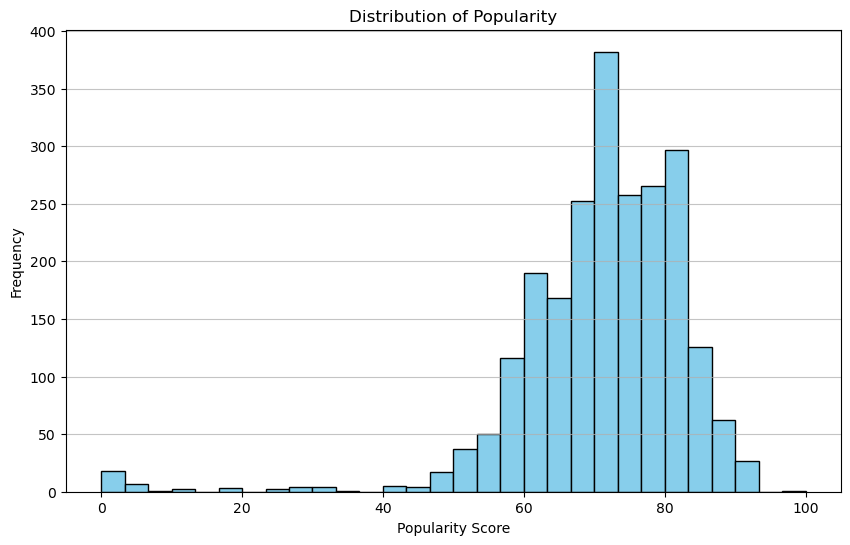

In [61]:
popularity = data['track_popularity']
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(popularity, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

We can see data is skewwed to the right, having some outliers in the left

In [62]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Assuming 'popularity' is a pandas series
# We need to convert it to a numpy array and then reshape for sklearn
X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

# Create a binary target variable, for example, 1 if above median, 0 otherwise
y = (popularity > np.median(popularity)).astype(int)

# Initialize and train the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
tree_clf.fit(X, y)

# Extract the threshold values
thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

# Print the thresholds - these can be used as bin edges
print("Thresholds for binning:", thresholds)

Thresholds for binning: [72.5]


In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Assuming 'popularity' is a pandas Series and we are binning based on the median
# Convert it to a numpy array and then reshape for sklearn
X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

# Create a binary target variable, for example, 1 if above median, 0 otherwise
y = (popularity > np.median(popularity)).astype(int)

# Initialize and train the gradient boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=2)  # You can tweak these hyperparameters
gb_clf.fit(X, y)

# Make predictions
predictions = gb_clf.predict(X)

# Calculate various metrics
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)
roc_auc = roc_auc_score(y, predictions)

# Print all metrics
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score: {:.2%}".format(f1))
print("ROC AUC: {:.2%}".format(roc_auc))

# Extract the threshold values from the gradient boosting model
# This part is tricky because GBT doesn't use thresholds in the same way single decision trees do
# However, you can still retrieve feature importances and partial dependence plots

feature_importance = gb_clf.feature_importances_
print("Feature importances for binning: ", feature_importance)

# For partial dependence plots, you might need a more complex setup, for example:
from sklearn.inspection import plot_partial_dependence



Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%
ROC AUC: 100.00%
Feature importances for binning:  [1.]


In [ ]:
decide = 2
if decide == 1:
    # Calculate quartile thresholds
    quantiles = data['track_popularity'].quantile([0.25, 0.5,0.75]).values

    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        elif popularity <= quantiles[2]:
            return 2  # High
        else:
            return 3  # Very High

    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 2:

    from sklearn.tree import DecisionTreeClassifier
    import numpy as np
    import pandas as pd

    # Assuming 'popularity' is a pandas series
    # We need to convert it to a numpy array and then reshape for sklearn
    X = popularity.values.reshape(-1, 1)  # Converts the Series to a numpy array and reshapes

    # Create a binary target variable, for example, 1 if above median, 0 otherwise
    y = (popularity > np.median(popularity)).astype(int)

    # Initialize and train the decision tree
    tree_clf = DecisionTreeClassifier(max_depth=2)  # You can choose a different depth as needed
    tree_clf.fit(X, y)

    # Extract the threshold values
    thresholds = tree_clf.tree_.threshold[tree_clf.tree_.feature >= 0]

    # Print the thresholds - these can be used as bin edges
    print("Thresholds for binning:", thresholds)
    quantiles = data['track_popularity'].quantile(thresholds/100).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        else:
            return 1  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data

elif decide == 3:
    quantiles = data['track_popularity'].quantile([0.33, 0.66]).values
    # Function to categorize based on quantiles
    def categorize_popularity(popularity, quantiles):
        if popularity <= quantiles[0]:
            return 0  # Low
        elif popularity <= quantiles[1]:
            return 1  # Medium
        else:
            return 2  # Very High
    # Apply the function to create the popularity bins
    data['popularity'] = data['track_popularity'].apply(categorize_popularity, quantiles=quantiles)
    data = data.drop(columns='track_popularity')
    data
elif decide == 4:
    # Bin the data using the median as the threshold
    median_threshold = np.median(popularity)
    print(median_threshold)
    y_binned_median = (popularity > median_threshold).astype(int)
    print(y_binned_median)
    data['popularity'] = y_binned_median
    data = data.drop(columns='track_popularity')
    data

elif decide == 5:
    # Bin the data using the mean as the threshold
    mean_threshold = np.mean(popularity)
    y_binned_mean = (popularity > mean_threshold).astype(int)
    print(y_binned_mean)
    data['popularity'] = y_binned_mean
    data = data.drop(columns='track_popularity')
    data



In [ ]:
unique, counts = np.unique(data["popularity"], return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

 Probably try DR

### Handling unbalanced Data

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

X = data.loc[:, data.columns != 'popularity']
Y = data['popularity']
# Computing the class weights
class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
class_weights_dict

## Models

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score, make_scorer, accuracy_score, f1_score
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


### Splitting Data

Regular Train/Test Split

In [ ]:
acc="accuracy" # our metric for Grid Searching

def split_df(dataframe, seed=seed, percentage=0.8):
    
    X = data.loc[:, dataframe.columns != 'popularity']
    y = data['popularity']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed, stratify=y) # note the stratify parameter

X_train, X_test, Y_train, Y_test = split_df(data, seed=42, percentage=0.8)
print("Number of explanatories: ", len(data.columns)-1)


### Decision Tree

Decision Tree

In [ ]:
# Decision Tree
model_dt = DecisionTreeClassifier(class_weight=class_weights_dict)
model_dt.fit(X_train, Y_train)
predictions_dt = model_dt.predict(X_test)

accDT = accuracy_score(Y_test, predictions_dt)
precisionDT = precision_score(Y_test, predictions_dt)
recallDT = recall_score(Y_test, predictions_dt)
f1DT = f1_score(Y_test, predictions_dt)
roc_aucDT = roc_auc_score(Y_test, predictions_dt)

print(f"Accuracy test set Decision Trees (not pruned) = {accDT:.2%}")
print(f"Precision test set Decision Trees: {precisionDT:.2%}")
print(f"Recall test set Decision Trees: {recallDT:.2%}")
print(f"F1-score test set Decision Trees: {f1DT:.2%}")
print(f"ROC AUC test set Decision Trees: {roc_aucDT:.2%}")

Decision Trees with Grid Search

In [ ]:
# Decision Tree with Grid Search
param_grid_dt = {'max_depth': range(1, 16)}
tree = GridSearchCV(DecisionTreeClassifier(class_weight=class_weights_dict), param_grid_dt, cv=5, verbose=2)
tree.fit(X_train, Y_train)
print("Best params for Decision Tree Grid Search: ", tree.best_params_)

tree_pruned = DecisionTreeClassifier(max_depth=tree.best_params_["max_depth"], criterion="entropy",
                                     class_weight=class_weights_dict)
tree_pruned.fit(X_train, Y_train)
predictions_pruned = tree_pruned.predict(X_test)

accDTGrid = accuracy_score(Y_test, predictions_pruned)
precisionDTGrid = precision_score(Y_test, predictions_pruned)
recallDTGrid = recall_score(Y_test, predictions_pruned)
f1DTGrid = f1_score(Y_test, predictions_pruned)
roc_aucDTGrid = roc_auc_score(Y_test, predictions_pruned)

print(f"Accuracy of Test set (pruned) = {accDTGrid:.2%}")
print(f"Precision of Test set (pruned) = {precisionDTGrid:.2%}")
print(f"Recall of Test set (pruned) = {recallDTGrid:.2%}")
print(f"F1-score of Test set (pruned) = {f1DTGrid:.2%}")
print(f"ROC AUC of Test set (pruned) = {roc_aucDTGrid:.2%}")

### Bagging

Bagging

In [ ]:
# Initialize the base estimator with class weights
base_estimator = DecisionTreeClassifier(class_weight=class_weights_dict)

# Initialize the Bagging classifier with the base estimator
model = BaggingClassifier(estimator=base_estimator, n_estimators=200, oob_score=True, bootstrap=True)

# Fit the model
model.fit(X_train, Y_train)

# Calculate the accuracy based on the Out-of-Bag (OOB) score
accBagg = model.oob_score_
predictions = model.predict(X_test)
accuracyBagg = accuracy_score(Y_test, predictions)
precisionBagg = precision_score(Y_test, predictions)
recallBagg = recall_score(Y_test, predictions)
f1Bagg = f1_score(Y_test, predictions)
roc_aucBagg = roc_auc_score(Y_test, predictions)

print("Accuracy OOB set Random Forests = {0:.2%}".format(accBagg))
print("Accuracy test set of Random Forests = {0:.2%}".format(accuracyBagg))
print("Precision test set of Random Forests: {0:.2%}".format(precisionBagg))
print("Recall test set of Random Forests: {0:.2%}".format(recallBagg))
print("F1-score test set of Random Forests: {0:.2%}".format(f1Bagg))
print("ROC AUC test set of Random Forests: {0:.2%}".format(roc_aucBagg))

Bagging with Grid Search

In [ ]:
# Initialize the base estimator with class weights
base_estimator = DecisionTreeClassifier(class_weight=class_weights_dict)

# Initialize the Bagging classifier with the base estimator
bagging_model = BaggingClassifier(estimator=base_estimator, bootstrap=True, oob_score=True)

# Define the parameter grid to search (using the correct double underscore for nested parameters)
param_grid = {
    'n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],  # Corrected parameter name
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2%}")

# Optional: Fit the model using the best parameters found
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)
accRFGrid = best_model.oob_score_
predictions = best_model.predict(X_test)
accuracyRFGrid = accuracy_score(Y_test, predictions)
precisionRFGrid = precision_score(Y_test, predictions)
recallRFGrid = recall_score(Y_test, predictions)
f1RFGrid = f1_score(Y_test, predictions)
roc_aucRFGrid = roc_auc_score(Y_test, predictions)

print(f"Accuracy OOB set - Bagging with Grid Searching: {accRFGrid:.2%}")
print(f"Accuracy on test set of Bagging with Grid Searching: {accuracyRFGrid:.2%}")
print("Precision test set of  Bagging with Grid Searching: {0:.2%}".format(precisionRFGrid))
print("Recall test set of  Bagging with Grid Searching: {0:.2%}".format(recallRFGrid))
print("F1-score test set of  Bagging with Grid Searching: {0:.2%}".format(f1RFGrid))
print("ROC AUC test set of  Bagging with Grid Searching: {0:.2%}".format(roc_aucRFGrid))

### Random Forest

Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=200, oob_score=True, max_features=8, class_weight=class_weights_dict)
model.fit(X_train, Y_train)

accRF = model.oob_score_
predictions = model.predict(X_test)
accuracyRF = accuracy_score(Y_test, predictions)
precisionRF = precision_score(Y_test, predictions)
recallRF = recall_score(Y_test, predictions)
f1RF = f1_score(Y_test, predictions)
roc_aucRF = roc_auc_score(Y_test, predictions)

print("Accuracy OOB set Random Forests = {0:.2%}".format(accRF))
print("Accuracy test set of Random Forests = {0:.2%}".format(accuracyRF))
print("Precision test set of Random Forests: {0:.2%}".format(precisionRF))
print("Recall test set of Random Forests: {0:.2%}".format(recallRF))
print("F1-score test set of Random Forests: {0:.2%}".format(f1RF))
print("ROC AUC test set of Random Forests: {0:.2%}".format(roc_aucRF))


Random Forest Grid Search

In [ ]:
param_grid_rf = {
    'min_samples_leaf': [3, 4, 5, 6],
    'max_features': [10, 15, 20, 25, 'auto', 'sqrt'],  # Include 'auto' and 'sqrt' for more options
}

model_rf = RandomForestClassifier(n_estimators=200, oob_score=True, class_weight=class_weights_dict)
RFGrid = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, verbose=2) 
RFGrid.fit(X_train, Y_train)
print("Best params for RF Grid Search: ", RFGrid.best_params_)

model_rf_best = RandomForestClassifier(n_estimators=200, oob_score=True, 
                                       max_features=RFGrid.best_params_["max_features"], 
                                       min_samples_leaf=RFGrid.best_params_["min_samples_leaf"], 
                                       class_weight=class_weights_dict)
model_rf_best.fit(X_train, Y_train)
accRFGrid = model_rf_best.oob_score_
predictions = model_rf_best.predict(X_test)
accuracyRFGrid = accuracy_score(Y_test, predictions)
precisionRFGrid = precision_score(Y_test, predictions)
recallRFGrid = recall_score(Y_test, predictions)
f1RFGrid = f1_score(Y_test, predictions)
roc_aucRFGrid = roc_auc_score(Y_test, predictions)

print(f"Accuracy OOB set - RF with Grid Searching: {accRFGrid:.2%}")
print(f"Accuracy on test set of RF with Grid Searching: {accuracyRFGrid:.2%}")
print("Precision test set of  RF with Grid Searching: {0:.2%}".format(precisionRFGrid))
print("Recall test set of  RF with Grid Searching: {0:.2%}".format(recallRFGrid))
print("F1-score test set of  RF with Grid Searching: {0:.2%}".format(f1RFGrid))
print("ROC AUC test set of  RF with Grid Searching: {0:.2%}".format(roc_aucRFGrid))


### Boosting

Boosting

In [ ]:
xgb = XGBClassifier(n_estimators=200, class_weight=class_weights_dict)
xgb.fit(X_train, Y_train)


# Predictions
predictions_XGBR = xgb.predict(X_test)

# Calculate various metrics
accBoost = accuracy_score(Y_test, predictions_XGBR)
precisionBoost = precision_score(Y_test, predictions_XGBR)
recallBoost = recall_score(Y_test, predictions_XGBR)
f1Boost = f1_score(Y_test, predictions_XGBR)
roc_aucBoost = roc_auc_score(Y_test, predictions_XGBR)

# Print all metrics
print("Accuracy test set of XGBClassifier: {0:.2%}".format(accBoost))
print("Precision test set of XGBClassifier: {0:.2%}".format(precisionBoost))
print("Recall test set of XGBClassifier: {0:.2%}".format(recallBoost))
print("F1-score test set of XGBClassifier: {0:.2%}".format(f1Boost))
print("ROC AUC test set of XGBClassifier: {0:.2%}".format(roc_aucBoost))


Boosting with Grid Search

In [ ]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

xgbGrid = GridSearchCV(XGBClassifier(class_weight=class_weights_dict), params, cv=5, scoring='f1', verbose=2)
xgbGrid.fit(X_train, Y_train)

# Access the best model
best_xgb = xgbGrid.best_estimator_

# Make predictions on the test set
predictions_xgb = best_xgb.predict(X_test)

# Calculate and print various metrics
accBoostGD = accuracy_score(Y_test, predictions_xgb)
precisionBoostGD = precision_score(Y_test, predictions_xgb)
recallBoostGD = recall_score(Y_test, predictions_xgb)
f1BoostGD = f1_score(Y_test, predictions_xgb)
roc_aucBoostGD = roc_auc_score(Y_test, predictions_xgb)

print("Accuracy test set of XGBClassifier: {0:.2%}".format(accBoostGD))
print("Precision test set of XGBClassifier: {0:.2%}".format(precisionBoostGD))
print("Recall test set of XGBClassifier: {0:.2%}".format(recallBoostGD))
print("F1-score test set of XGBClassifier: {0:.2%}".format(f1BoostGD))
print("ROC AUC test set of XGBClassifier: {0:.2%}".format(roc_aucBoostGD))


### KNN

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier
# Note: KNN does not support class_weight directly like some other classifiers.
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is a hyperparameter you can tune

# Fit the model on the training data
knn.fit(X_train, Y_train)

# Make predictions on the test set
predictions_KNN = knn.predict(X_test)

# Calculate various metrics
accKNN = accuracy_score(Y_test, predictions_KNN)
precisionKNN = precision_score(Y_test, predictions_KNN)
recallKNN = recall_score(Y_test, predictions_KNN)
f1KNN = f1_score(Y_test, predictions_KNN)
roc_aucKNN = roc_auc_score(Y_test, predictions_KNN)

# Print all metrics
print("Accuracy test set of KNeighborsClassifier: {0:.2%}".format(accKNN))
print("Precision test set of KNeighborsClassifier: {0:.2%}".format(precisionKNN))
print("Recall test set of KNeighborsClassifier: {0:.2%}".format(recallKNN))
print("F1-score test set of KNeighborsClassifier: {0:.2%}".format(f1KNN))
print("ROC AUC test set of KNeighborsClassifier: {0:.2%}".format(roc_aucKNN))


KNN with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid: n_neighbors is a common parameter to tune for KNN.
# You can also tune 'weights' (uniform, distance) and 'metric' (euclidean, manhattan, etc.)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example: testing different numbers of neighbors
    'weights': ['uniform', 'distance'],  # How to weight the contribution of neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric for calculation
}

# Initialize GridSearchCV with KNN estimator
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2%}")

# Use the best estimator for further predictions
best_knn = grid_search.best_estimator_

# Predictions
predictions_KNN = best_knn.predict(X_test)


accKNGS = accuracy_score(Y_test, predictions_KNN)
precisionKNGS = precision_score(Y_test, predictions_KNN)
recallKNGS = recall_score(Y_test, predictions_KNN)
f1KNGS = f1_score(Y_test, predictions_KNN)
roc_aucKNGS = roc_auc_score(Y_test, predictions_KNN)

# Print all metrics
print("Accuracy test set of KNeighborsClassifier: {0:.2%}".format(accKNGS))
print("Precision test set of KNeighborsClassifier: {0:.2%}".format(precisionKNGS))
print("Recall test set of KNeighborsClassifier: {0:.2%}".format(recallKNGS))
print("F1-score test set of KNeighborsClassifier: {0:.2%}".format(f1KNGS))
print("ROC AUC test set of KNeighborsClassifier: {0:.2%}".format(roc_aucKNGS))



### CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(n_estimators=200, class_weights=class_weights_dict, verbose=0)

# Fit the model
catboost_model.fit(X_train, Y_train)

# Predictions
predictions_catboost = catboost_model.predict(X_test)

# Calculate various metrics
accCatBoost = accuracy_score(Y_test, predictions_catboost)
precisionCatBoost = precision_score(Y_test, predictions_catboost)
recallCatBoost = recall_score(Y_test, predictions_catboost)
f1CatBoost = f1_score(Y_test, predictions_catboost)
roc_aucCatBoost = roc_auc_score(Y_test, predictions_catboost)

# Print all metrics
print("Accuracy test set of CatBoostClassifier: {0:.2%}".format(accCatBoost))
print("Precision test set of CatBoostClassifier: {0:.2%}".format(precisionCatBoost))
print("Recall test set of CatBoostClassifier: {0:.2%}".format(recallCatBoost))
print("F1-score test set of CatBoostClassifier: {0:.2%}".format(f1CatBoost))
print("ROC AUC test set of CatBoostClassifier: {0:.2%}".format(roc_aucCatBoost))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load the data
file_path = 'Songs_2024(1).xlsx'  # Make sure to update the path
data = pd.read_excel(file_path)

# Transform 'track_popularity' into a binary target variable
popularity_threshold = data['track_popularity'].quantile(0.825)
data['is_highly_popular'] = (data['track_popularity'] > popularity_threshold).astype(int)

# Prepare features and target
X = data.drop(['year', 'track_name', 'track_popularity', 'album', 'artist_name', 'artist_genres', 'is_highly_popular'], axis=1)
y = data['is_highly_popular']

# Fill missing values with median
X = X.fillna(X.median())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost classifier
model = CatBoostClassifier(verbose=False, random_state=42)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
catboost_params = {
    'n_estimators': [100, 200, 300],
    'depth': [4, 6, 8],  # Note: CatBoost uses 'depth' instead of 'max_depth'
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]  # For CatBoost, use 'bootstrap_type': 'Bernoulli' and 'subsample': <value> in combination
}

# Initialize the GridSearchCV object for CatBoostClassifier
catboost_grid = GridSearchCV(CatBoostClassifier(class_weights=class_weights_dict, verbose=0, bootstrap_type='Bernoulli'), 
                             catboost_params, cv=5, scoring='f1', verbose=2)

# Fit the model
catboost_grid.fit(X_train, Y_train)

# Access the best model
best_catboost = catboost_grid.best_estimator_

# Make predictions on the test set
predictions_catboost_grid = best_catboost.predict(X_test)

# Calculate and print various metrics
accCatBoostGD = accuracy_score(Y_test, predictions_catboost_grid)
precisionCatBoostGD = precision_score(Y_test, predictions_catboost_grid)
recallCatBoostGD = recall_score(Y_test, predictions_catboost_grid)
f1CatBoostGD = f1_score(Y_test, predictions_catboost_grid)
roc_aucCatBoostGD = roc_auc_score(Y_test, predictions_catboost_grid)

print("Accuracy test set of CatBoostClassifier with GridSearch: {0:.2%}".format(accCatBoostGD))
print("Precision test set of CatBoostClassifier with GridSearch: {0:.2%}".format(precisionCatBoostGD))
print("Recall test set of CatBoostClassifier with GridSearch: {0:.2%}".format(recallCatBoostGD))
print("F1-score test set of CatBoostClassifier with GridSearch: {0:.2%}".format(f1CatBoostGD))
print("ROC AUC test set of CatBoostClassifier with GridSearch: {0:.2%}".format(roc_aucCatBoostGD))


## Summary of Results 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adding KNN metrics to the data dictionary
data = {
    'Model': ['BoostGD', 'BoostGD', 'BoostGD', 'BoostGD', 'BoostGD',
              'Boost', 'Boost', 'Boost', 'Boost', 'Boost',
              'RFGrid', 'RFGrid', 'RFGrid', 'RFGrid', 'RFGrid',
              'RF', 'RF', 'RF', 'RF', 'RF',
              'Bagging', 'Bagging', 'Bagging', 'Bagging', 'Bagging',
              'DTGrid', 'DTGrid', 'DTGrid', 'DTGrid', 'DTGrid',
              'DT', 'DT', 'DT', 'DT', 'DT',
              'KNGS', 'KNGS', 'KNGS', 'KNGS', 'KNGS',
              'KNN', 'KNN', 'KNN', 'KNN', 'KNN'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'] * 9,
    'Score': [accBoostGD, precisionBoostGD, recallBoostGD, f1BoostGD, roc_aucBoostGD,
              accBoost, precisionBoost, recallBoost, f1Boost, roc_aucBoost,
              accRFGrid, precisionRFGrid, recallRFGrid, f1RFGrid, roc_aucRFGrid,
              accRF, precisionRF, recallRF, f1RF, roc_aucRF,
              accBagg, precisionBagg, recallBagg, f1Bagg, roc_aucBagg,
              accDTGrid, precisionDTGrid, recallDTGrid, f1DTGrid, roc_aucDTGrid,
              accDT, precisionDT, recallDT, f1DT, roc_aucDT,
              accKNGS, precisionKNGS, recallKNGS, f1KNGS, roc_aucKNGS,
              accKNN, precisionKNN, recallKNN, f1KNN, roc_aucKNN]
}

# Converting the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Creating the bar plot
plt.figure(figsize=(16, 9))
sns.barplot(x='Metric', y='Score', hue='Model', data=df, palette='viridis')

plt.title('Comprehensive Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming score values are between 0 and 1
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
pip install catboost
